<a href="https://colab.research.google.com/github/victorsantanaa/imersaoDadosAlura/blob/main/Desafios_Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafios Aula 02 - Imersão em Dados Alura 2

Resolução realizada por [Victor Santana](https://github.com/victorsantanaa)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
 
dados = pd.read_csv(fonte)

In [63]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

## Mega Desafio: Pegar a amostra completa dos alunos de 13 e 14 anos

###Feito localmente pelo Jupyter Notebook - Colocarei o código aqui e as imagens dos resultados

fonte = ('MICRODADOS_ENEM_2019.csv')

dados = pd.read_csv(fonte, 
                    encoding="ISO-8859-1",
                    delimiter=";")

dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize = True)*100

alunos_menor_quartoze = dados.query("NU_IDADE <= 14")
grafico = alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts(normalize = True)*100
grafico.plot.bar(figsize=(10,8))

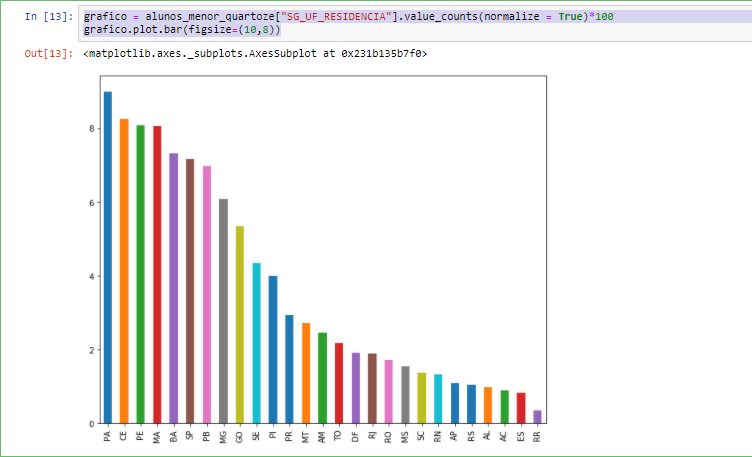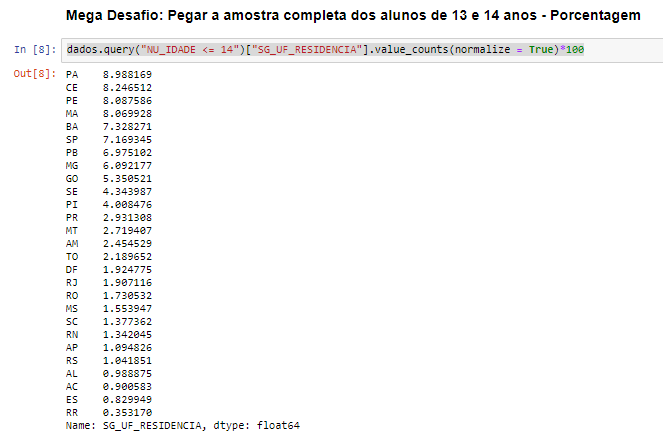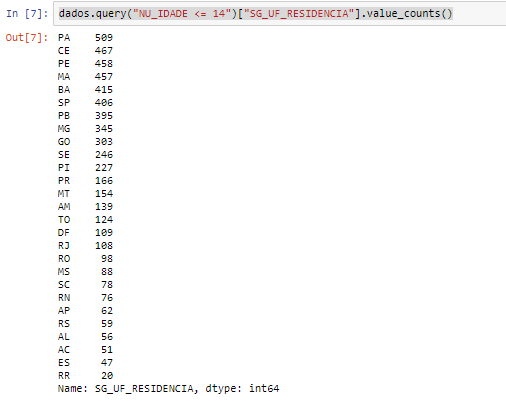

## Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

In [10]:
alunos_menor_idade = dados.query("NU_IDADE<=17")
alunos_menor_idade["SG_UF_RESIDENCIA"].value_counts()

SP    7321
MG    3146
BA    1993
CE    1953
PE    1805
PR    1764
RJ    1651
PA    1268
GO    1199
MA    1164
RS     990
PB     838
SC     795
PI     678
MT     612
ES     517
DF     472
AL     446
RN     429
AM     428
MS     421
SE     405
TO     344
RO     234
AP     188
AC     109
RR      70
Name: SG_UF_RESIDENCIA, dtype: int64

In [12]:
porcentagem_alunos_menor = alunos_menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize=True)*100
porcentagem_alunos_menor

SP    23.434699
MG    10.070423
BA     6.379641
CE     6.251601
PE     5.777849
PR     5.646607
RJ     5.284891
PA     4.058899
GO     3.838028
MA     3.725992
RS     3.169014
PB     2.682458
SC     2.544814
PI     2.170294
MT     1.959027
ES     1.654930
DF     1.510883
AL     1.427657
RN     1.373239
AM     1.370038
MS     1.347631
SE     1.296415
TO     1.101152
RO     0.749040
AP     0.601793
AC     0.348912
RR     0.224072
Name: SG_UF_RESIDENCIA, dtype: float64

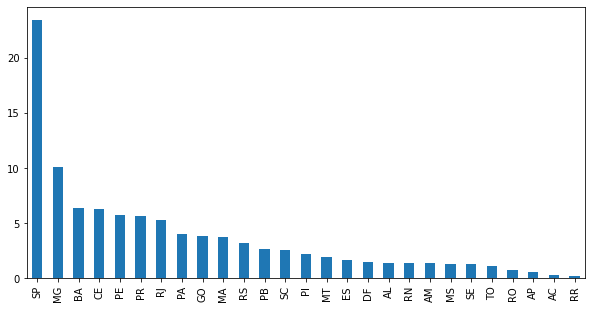

In [13]:
porcentagem_alunos_menor.plot.bar(figsize = (10,5))

##Desafio 3: Criar uma função para plotar o boxplot do seaborn

In [25]:
def boxplot(eixo_x, eixo_y, data_frame, titulo):
  eixo_x_ordenado = data_frame[eixo_x].unique()
  eixo_x_ordenado.sort()
  plt.figure(figsize=(10,5))
  sns.boxplot(x=eixo_x, y=eixo_y, data=data_frame, order = eixo_x_ordenado)
  plt.title(titulo)

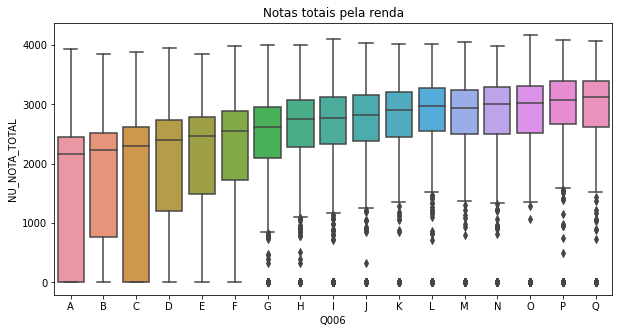

In [26]:
boxplot("Q006", "NU_NOTA_TOTAL", dados, "Notas totais pela renda")

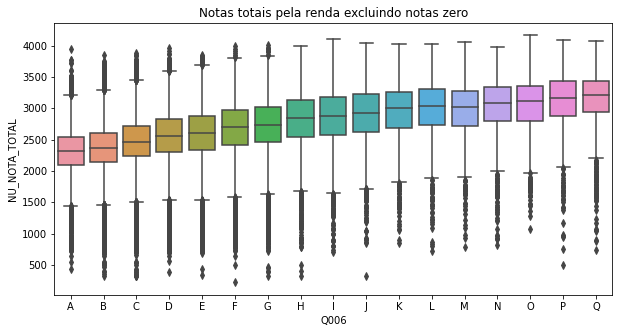

In [27]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
boxplot("Q006", "NU_NOTA_TOTAL", dados_sem_notas_zero, "Notas totais pela renda excluindo notas zero")

## Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

In [28]:
# 0 - Faltou
# 1 - Compareceu
# 2 - Eliminado
presenca = ["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT"]

dados_apenas_notas_zero = dados.query("NU_NOTA_TOTAL == 0")
dados_apenas_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,1,1506807.0,Santarém,15.0,PA,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,B,A,B,2,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,1,1501709.0,Bragança,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,A,4,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,1,1721208.0,Tocantinópolis,17.0,TO,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,B,C,C,2,C,A,B,B,A,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,1,2108108.0,Paulo Ramos,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,C,A,A,B,0.0
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,1,1504422.0,Marituba,15.0,PA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,F,B,6,G,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,D,A,A,B,0.0


In [29]:
dados_apenas_notas_zero[presenca]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
10,0,0,0,0
11,0,0,0,0
26,0,0,0,0
38,0,0,0,0
40,0,0,0,0
...,...,...,...,...
127351,0,0,0,0
127365,0,0,0,0
127366,0,0,0,0
127368,0,0,0,0


In [46]:
dados_apenas_notas_zero[presenca].value_counts()


TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT
0               0               0               0                 28998
                2               2               0                   120
                1               1               0                    39
1               0               0               1                     3
                1               1               1                     2
dtype: int64

Vemos que a grande maioria que zerou a prova, não compareceu a ela, poucos tiveram sua prova anulada e apenas dois compareceram em todas as provas e ainda assim zeraram a prova

In [47]:
dados.query("NU_NOTA_TOTAL == 0")["TP_PRESENCA_CN"].value_counts()

0    29157
1        5
Name: TP_PRESENCA_CN, dtype: int64

In [48]:
dados.query("NU_NOTA_TOTAL == 0")["TP_PRESENCA_CH"].value_counts()

0    29001
2      120
1       41
Name: TP_PRESENCA_CH, dtype: int64

In [49]:
dados.query("NU_NOTA_TOTAL == 0")["TP_PRESENCA_MT"].value_counts()

0    29157
1        5
Name: TP_PRESENCA_MT, dtype: int64

In [50]:
dados.query("NU_NOTA_TOTAL == 0")["TP_PRESENCA_LC"].value_counts()

0    29001
2      120
1       41
Name: TP_PRESENCA_LC, dtype: int64

In [57]:
dados_apenas_notas_zero[presenca].value_counts(normalize = True)*100

TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT
0               0               0               0                 99.437624
                2               2               0                  0.411494
                1               1               0                  0.133736
1               0               0               1                  0.010287
                1               1               1                  0.006858
dtype: float64

##Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

In [61]:
#Vou pegar como exemplo a prova de Matemática
#2 - Eliminado

dados.query("TP_PRESENCA_MT == 2")["NU_NOTA_MT"].unique()

array([nan])

Todos que foram eliminados (TP_PRESENCA_MT = 2) tiveram sua nota definida como um Not A Number (NanN), ou seja, quem é eliminado não tira zero.

In [ ]:
T

##Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

Text(0.5, 1.0, 'Proporção de Treineiros e Não Treineiros por Renda ')

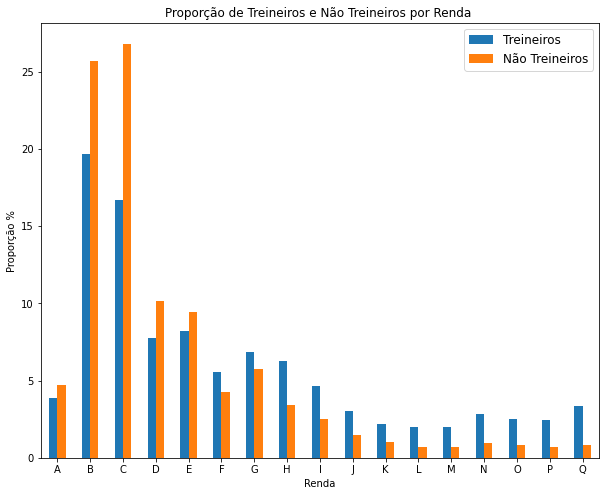

In [69]:
# Desafio 6

renda_alunos_nao_treineiros = dados.query("IN_TREINEIRO == 0")["Q006"].value_counts(normalize = True).sort_index() * 100
renda_alunos_treineiros = dados.query("IN_TREINEIRO == 1")["Q006"].value_counts(normalize = True).sort_index() * 100

dados_renda_treineiros = pd.DataFrame({
    'treineiros': renda_alunos_treineiros, 
    'não treineiros': renda_alunos_nao_treineiros
    })

dados_renda_treineiros.plot.bar(xlabel = "Renda", ylabel = "Proporção %", rot = 0, figsize = (10,8))
plt.legend(["Treineiros", "Não Treineiros"], fontsize = "large")
plt.title("Proporção de Treineiros e Não Treineiros por Renda ")

##Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

Text(0.5, 1.0, 'Boxplot de nota Total pela renda comparando entre quem tem e quem não tem internet')

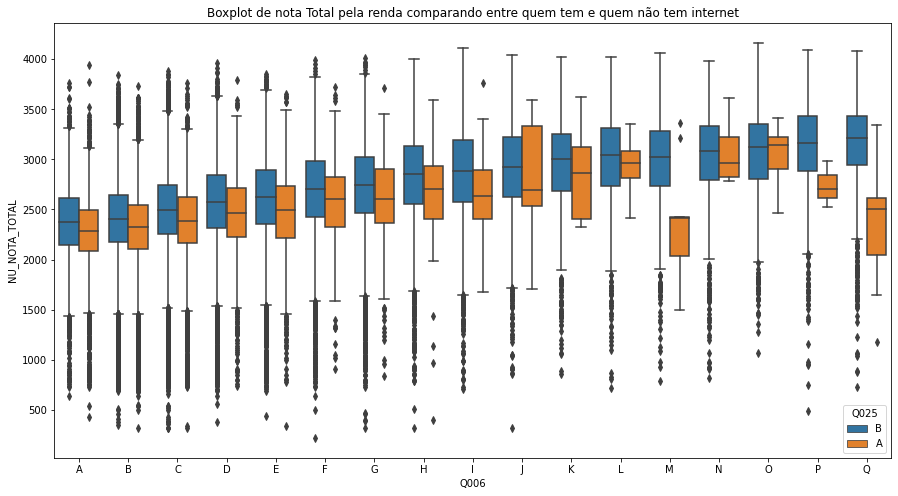

In [65]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Q006", y= "NU_NOTA_TOTAL", data= dados_sem_notas_zero, order = renda_ordenada,
            hue = "Q025")
plt.title("Boxplot de nota Total pela renda comparando entre quem tem e quem não tem internet")